# Homework - Part 1 - Naive Bayes

# Naive Bayes

## Spam detector for SMS messages

We will use Naive Bayes method to calssify SMS messages as spam or ham (i.e., non-spam). To that end, we will use three libraries:
1. skllearn - for Naive Bayes
2. pandas - for data handling
3. nltk - for manipulation of text



## 1. Loading data

The SMS Spam Collection contains 5,572 messages, tagged according being ham (legitimate) or spam. 
The dataset has the format [label] [tab] [message], which looks something like this:

ham &emsp; Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... <br>
ham &emsp; Ok lar... Joking wif u oni... <br>
ham	&emsp; U dun say so early hor... U c already then say...

In [1]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', 
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [2]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## 2. Data Preprocessing

### Exercise:
Do the following:
1. Change the labels of ham into 0 and spam into 1
2. Convert all messages to lower case
3. Find the distribution of messages. Namely, how many spam and how many ham SMS messages there are. What is their percetage of total messages?

### Solution:

In [3]:
# Part 1 - change ham to 0 and spam to 1
df['label'] = df['label'].replace({"ham": 0, "spam": 1})


In [4]:
# Part 2:  Convert to lower case
df['message'] = df['message'].str.lower()

In [5]:
# Part 3 - number of SMS messages of each type
count = df['label'].value_counts() #the number of spam masseges is 747 and non spam 4825
print(count)
100*count/len(df) #the precentage of spam masseges is 13.40% and non spam 86.59%


0    4825
1     747
Name: label, dtype: int64


0    86.593683
1    13.406317
Name: label, dtype: float64



--------

In [6]:
# part 4 - provided free of charge. 
# removinhg punctuation

df['message'] = df['message'].str.strip()
#df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## 3. Data preprocessing using nltk package

nltk - natural language toolkit package is a package that processes text. We will use it to separate words and use their counts.

But first, let's see how this works

### nltk example

In [7]:
import nltk

In [8]:
nltk.download('punkt') #- in case stuff is missing/not working

# break sentence into tokens (words)
sentence = 'At eight o\'clock on Thursday morning Arthur didn\'t feel very good '
tokens = nltk.word_tokenize(sentence)
tokens



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dorba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

In [9]:
# Remove tenses and conjugations of words
from nltk.stem import PorterStemmer

ps = PorterStemmer()   # this is a particular algoirthm


example_words = ["python","pythoner","pythoning","pythoned", "pythoned", "pythonly", "pythonant"]
for w in example_words:
    print(ps.stem(w))    
    

python
python
python
python
python
pythonli
python


In [10]:
text = "It is important to be very pythonly while you are pythoning with python. \
            All pythoners have pythoned poorly at least once."

words = nltk.word_tokenize(text)
new_text = []
for w in words:
    #print(ps.stem(w))
    new_text.append(ps.stem(w))
    
print (' '.join(new_text))

it is import to be veri pythonli while you are python with python . all python have python poorli at least onc .


### Back to SMS messages

Separating messages into words - i.e., tokenizing

In [11]:
df2 = df.copy()
df2['message'] = df2['message'].apply(nltk.word_tokenize)  

# NOTE: using df2, because otherwise you can't run this twice. 
# word_tokenize takes as argument a string, and after this is done,
# the contents of df['message'] is a list

In [12]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


Applying Porter Stemmer to the words of each message

In [13]:
df2['message'] = df2['message'].apply(lambda x: [ps.stem(y) for y in x])

In [14]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, ,, crazi, .., avail..."
1,0,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, ..., u, c, alrea..."
4,0,"[nah, i, do, n't, think, he, goe, to, usf, ,, ..."


## 4.  Data Preprocessing using sklearn

### Counting words - example first

Convert a collection of text documents to a matrix of token counts

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
text_collection = ['This is the first document.',
                   'This document is the second document.',
                   'And this is the third one.',
                   'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_collection) # vocabulary dictionary of all tokens in documents, aka: features

print(vectorizer.get_feature_names_out())   # prints the distinct words
print ()

print (X)           # first index - line of text
                    # secobd index - index of feature that appears in the line. 
                    # second index is oredered by features array not by order in which they appear in the line 
print ()
print(X.toarray())  # Each row of the matrix indicates which features appear in the correspoding line 
                    # (order is not preserved, of course). For example, in row 2, the seond value is 2, 
                    # which means that the feature 'document' appears twice in the second line. As is the case

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Word count per message on df2

In [16]:
# This converts the list of words into space-separated strings - so we're back to a phrase for each message 
df3 = df2.copy()
df3['message'] = df3['message'].apply(lambda x: ' '.join(x))
df3.head()

,label,message
0,0,"go until jurong point , crazi .. avail onli in..."
1,0,ok lar ... joke wif u oni ...
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor ... u c alreadi then sa...
4,0,"nah i do n't think he goe to usf , he live aro..."


In [17]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df3['message'])

In [18]:
print(count_vect.get_feature_names_out())

['00' '000' '000pe' ... 'èn' 'ú1' '〨ud']


In [19]:
print (counts)  

  (0, 3121)	1
  (0, 6911)	1
  (0, 3811)	1
  (0, 5163)	1
  (0, 2092)	1
  (0, 1247)	1
  (0, 4834)	1
  (0, 3580)	1
  (0, 1640)	1
  (0, 3199)	1
  (0, 7301)	1
  (0, 3922)	1
  (0, 1638)	1
  (0, 1880)	1
  (0, 6575)	1
  (0, 3161)	1
  (0, 1053)	1
  (0, 7112)	1
  (1, 4805)	1
  (1, 3954)	1
  (1, 3777)	1
  (1, 7220)	1
  (1, 4832)	1
  (2, 3580)	1
  (2, 2951)	1
  :	:
  (5570, 3688)	1
  (5570, 7148)	1
  (5570, 1066)	1
  (5570, 4036)	1
  (5570, 6072)	1
  (5570, 2909)	1
  (5570, 6556)	1
  (5570, 1366)	1
  (5570, 4646)	1
  (5570, 2313)	1
  (5570, 6942)	1
  (5570, 1664)	1
  (5570, 6081)	1
  (5570, 1668)	1
  (5570, 2569)	1
  (5570, 3048)	1
  (5570, 3243)	1
  (5570, 3644)	1
  (5570, 907)	1
  (5570, 1463)	1
  (5571, 6669)	1
  (5571, 3688)	2
  (5571, 4565)	1
  (5571, 6783)	1
  (5571, 5619)	1


 Observe that first index runs until 5571, because there 5572 messages

In [20]:
print(counts.toarray())  # this is a very sparse matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print (counts.shape)
print (counts[0,7191])

print (counts) 

(5572, 7456)
0
  (0, 3121)	1
  (0, 6911)	1
  (0, 3811)	1
  (0, 5163)	1
  (0, 2092)	1
  (0, 1247)	1
  (0, 4834)	1
  (0, 3580)	1
  (0, 1640)	1
  (0, 3199)	1
  (0, 7301)	1
  (0, 3922)	1
  (0, 1638)	1
  (0, 1880)	1
  (0, 6575)	1
  (0, 3161)	1
  (0, 1053)	1
  (0, 7112)	1
  (1, 4805)	1
  (1, 3954)	1
  (1, 3777)	1
  (1, 7220)	1
  (1, 4832)	1
  (2, 3580)	1
  (2, 2951)	1
  :	:
  (5570, 3688)	1
  (5570, 7148)	1
  (5570, 1066)	1
  (5570, 4036)	1
  (5570, 6072)	1
  (5570, 2909)	1
  (5570, 6556)	1
  (5570, 1366)	1
  (5570, 4646)	1
  (5570, 2313)	1
  (5570, 6942)	1
  (5570, 1664)	1
  (5570, 6081)	1
  (5570, 1668)	1
  (5570, 2569)	1
  (5570, 3048)	1
  (5570, 3243)	1
  (5570, 3644)	1
  (5570, 907)	1
  (5570, 1463)	1
  (5571, 6669)	1
  (5571, 3688)	2
  (5571, 4565)	1
  (5571, 6783)	1
  (5571, 5619)	1


## 5. Training the model

In [22]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=120)

print (X_train.shape)   # each row has 7536 features (all possible words) 
print (y_train.shape)   # recall, label is ham or spam (1 or 0)
print (X_test.shape)



(5014, 7456)
(5014,)
(558, 7456)


Initialize a Naive Bayes Classifier and fit the data. For text classification problems, the Multinomial Naive Bayes Classifier is well-suited.

In [23]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

## 6. Evaluating the Model


In [24]:
import numpy as np

y_test_pred = model.predict(X_test)
print('Model accuracy on test set: %.1f%%' % (100*np.mean(y_test_pred == y_test)))

Model accuracy on test set: 98.4%


The Naive Bayes Classifier has 98.2% accuracy on this specific test set. Is this good? Well, maybe... 

The data is skewed. 86.6% is ham and 13.4% is spam. So a really dumb classifier that classifies all messages as ham would have a 86.6% accuracy. 

# Exercise:

1. Print the confusion matrix
2. What are the precision and recall and F1 scores?
3. Plot ROC, and calculate AUC
4. What is your conclusion?

# Solution:

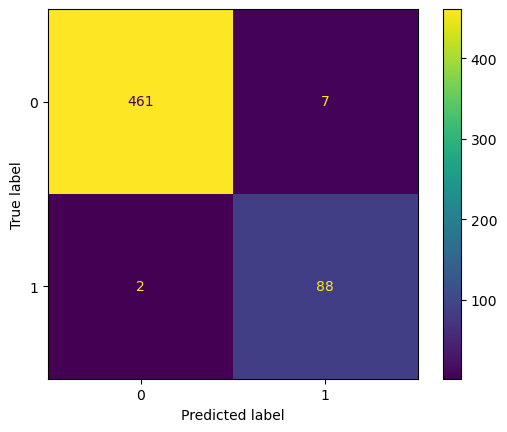

In [82]:
#1
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)



In [77]:
#2
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)

Precision:  [0.99573561 0.93220339]
Recall:  [0.98731501 0.97633136]
F1-score:  [0.99150743 0.95375723]


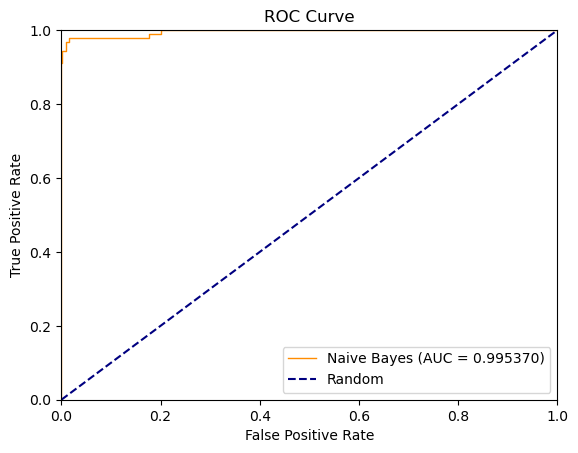

In [32]:
#3
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1,color='darkorange', label='Naive Bayes (AUC = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='navy', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4.conclusion:

### The Naive Bayes model got hige scores of precision, recall and f1 score that goes along with the 98.2% accuracy  that show better result then prior model with prabability of 86%. The ROC curve shows us that the TP rate and FP get the heighst score to one when the classfier is in low precent of the data, that showes us like the data the very small amount of spam(13%) can classficy best close to that.The rest of curve get more FP rate greater in the rest of the curve like the Naive Baise strong assumption of independence between the features, so it would be biased and less flexible like our data.
